In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
heart = pd.read_csv("C:/Users/HP/Desktop/heart.csv")

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
age         303 non-null int64
sex         303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
ca          303 non-null int64
target      303 non-null int64
cp_0        303 non-null uint8
cp_1        303 non-null uint8
cp_2        303 non-null uint8
cp_3        303 non-null uint8
thal_0      303 non-null uint8
thal_1      303 non-null uint8
thal_2      303 non-null uint8
thal_3      303 non-null uint8
slope_0     303 non-null uint8
slope_1     303 non-null uint8
slope_2     303 non-null uint8
dtypes: float64(1), int64(10), uint8(11)
memory usage: 29.4 KB


## Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [53]:
heart.isnull().any()

age         False
sex         False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
ca          False
target      False
cp_0        False
cp_1        False
cp_2        False
cp_3        False
thal_0      False
thal_1      False
thal_2      False
thal_3      False
slope_0     False
slope_1     False
slope_2     False
dtype: bool

In [5]:
# female = 0
# male = 1

female = len(heart[heart['sex'] ==0])
male = len(heart[heart['sex'] ==1])

print('Percentage of female: {:.2f} %' .format(female/len(heart['sex'])*100))
print('Percentage of male: {:.2f} %' .format(male/len(heart['sex'])*100))

Percentage of female: 31.68 %
Percentage of male: 68.32 %


## HEAT-MAP for Heart Patients

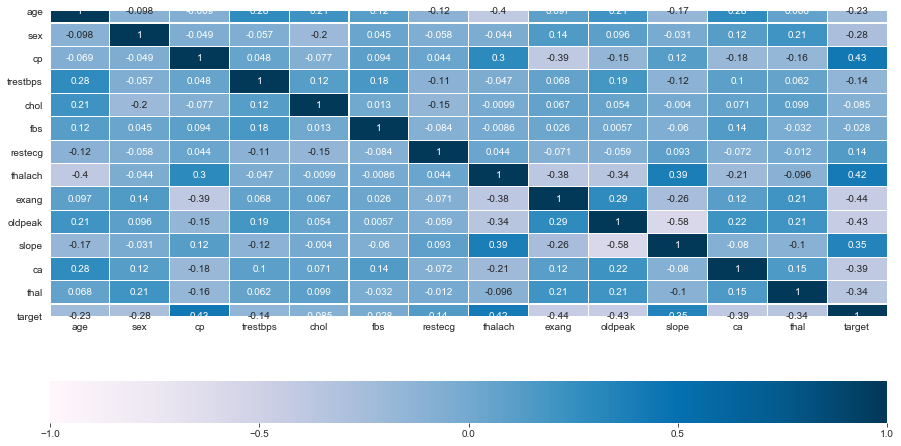

In [6]:
plt.figure(figsize=(15,8))
cbar_kws = { 'ticks' : [-1, -0.5, 0, 0.5, 1], 'orientation': 'horizontal'}
sns.heatmap(heart.corr(), cmap='PuBu', linewidths=0.1, annot=True, vmax=1, vmin=-1, cbar_kws=cbar_kws)

## Distribution-Age

Text(0.5, 1.0, 'Distribution of age')

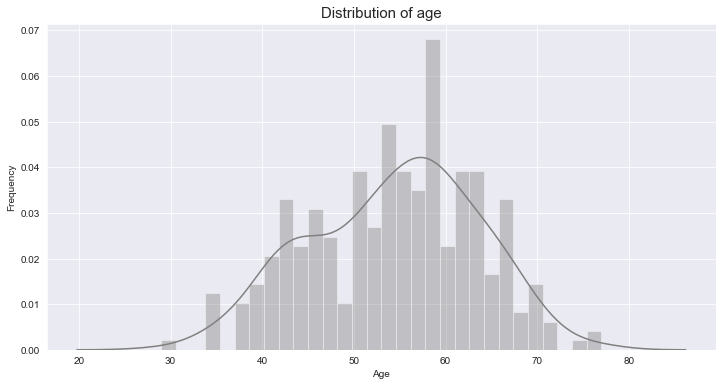

In [8]:
plt.figure(figsize=(12,6))
sns.distplot(heart['age'], hist=True, bins=30, color='grey')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age', fontsize=15)

## Count-Sex

In [9]:
heart['sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64>

Text(0.5, 1.0, 'Gender')

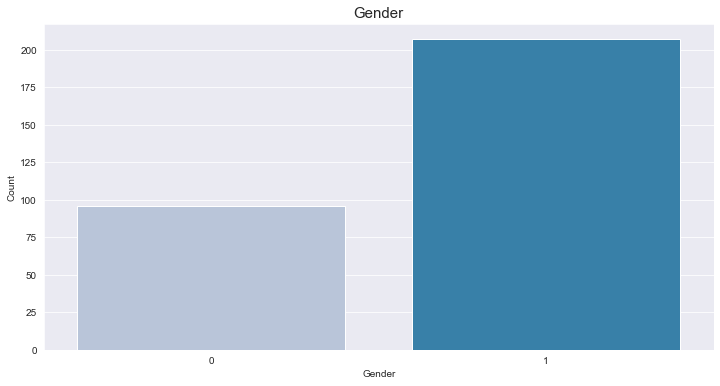

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(heart['sex'], palette='PuBu')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender', fontsize=15)

## Gender Count at different ages

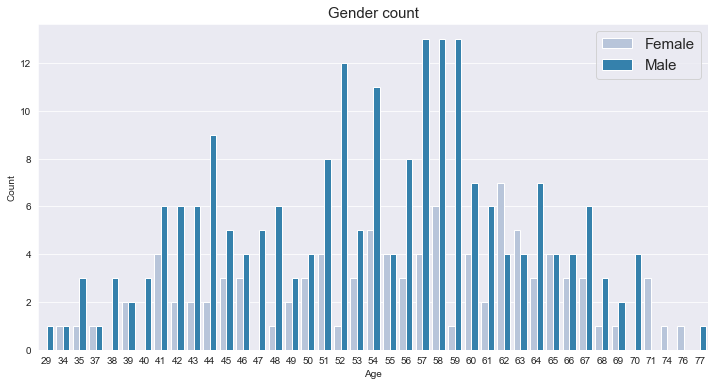

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(heart['age'], hue=heart['sex'], palette='PuBu', saturation=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Gender count', fontsize=15)
plt.legend(loc='upper right', fontsize=15, labels=['Female', 'Male'])

## Target Count

Text(0.5, 1.0, 'Target count')

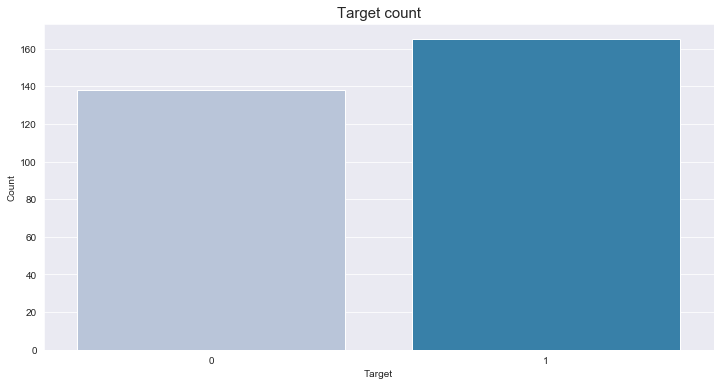

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(heart['target'], palette='PuBu')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target count', fontsize=15)

## Target at different ages

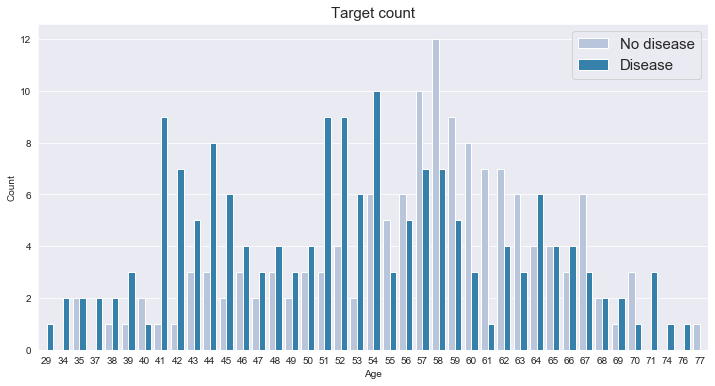

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(heart['age'], hue=heart['target'], palette='PuBu', saturation=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target count', fontsize=15)
plt.legend(loc='upper right', fontsize=15, labels=['No disease', 'Disease'])

## Percentage of Target

In [18]:
countNoDisease = len(heart[heart.target == 0])
countHaveDisease = len(heart[heart.target == 1])
print("Percentage of Patients without Heart Disease: {:.2f}%".format((countNoDisease / (len(heart.target))*100)))
print("Percentage of Patients with Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart.target))*100)))

Percentage of Patients without Heart Disease: 45.54%
Percentage of Patients with Heart Disease: 54.46%


## Male and Female - Heart Disease Frequency 

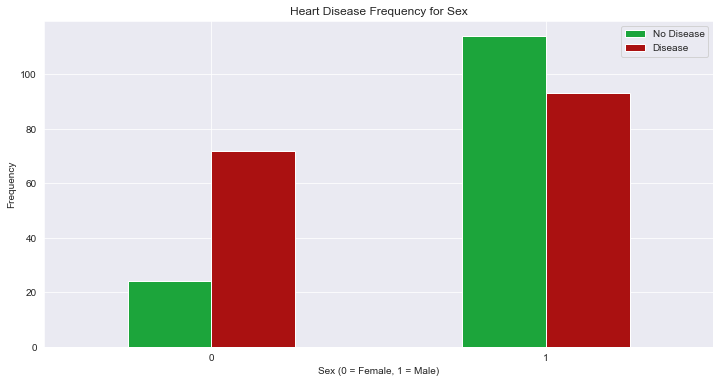

In [20]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(12,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

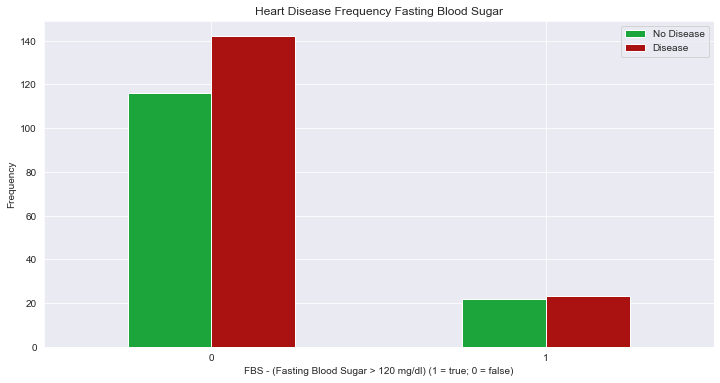

In [21]:
pd.crosstab(heart.fbs,heart.target).plot(kind="bar",figsize=(12,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency Fasting Blood Sugar')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

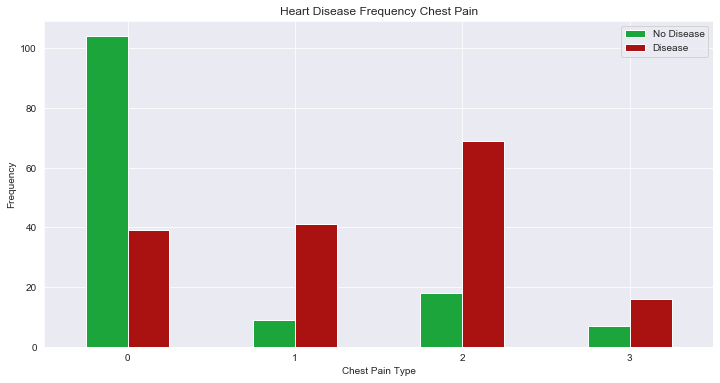

In [24]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(12,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency Chest Pain')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

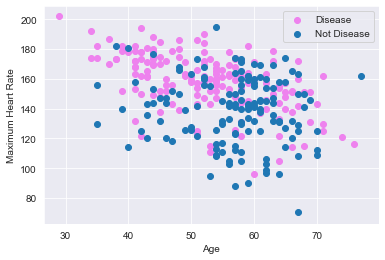

In [25]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="violet")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## DUMMY VARIABLES FOR CATEGORICAL VARIABLES - chest pain type, thal type and slope type

In [26]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
a = pd.get_dummies(heart['cp'], prefix = "cp")
b = pd.get_dummies(heart['thal'], prefix = "thal")
c = pd.get_dummies(heart['slope'], prefix = "slope")

In [28]:
frames = [heart, a, b, c]
heart = pd.concat(frames, axis = 1)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [29]:
heart = heart.drop(columns = ['cp', 'thal', 'slope'])
heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## Logistic Regression

In [30]:
y = heart.target.values
x_data = heart.drop(['target'], axis = 1)

## MIN MAX SCALING - NORMALIZATION

In [31]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [32]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0 )

In [34]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.89%


In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


In [36]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 86.89%


In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 78.69%


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


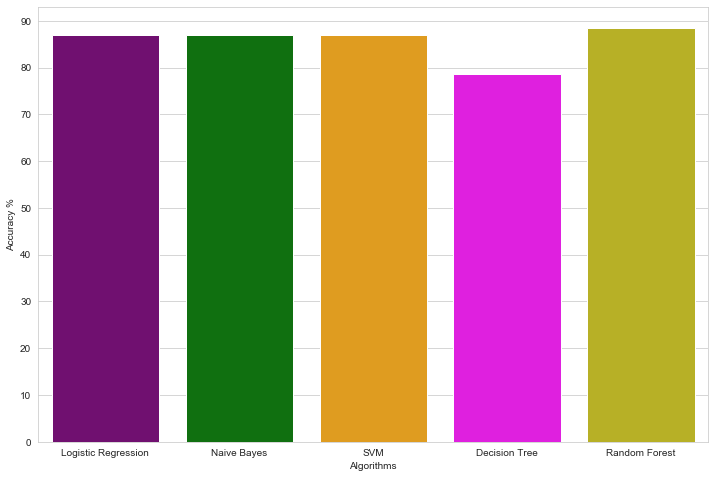

In [41]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Grid Search CV

In [42]:
rf = RandomForestClassifier()

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
#Using grid search to get best params for Randomforest
params = {
    'n_estimators':[10,50,100,150,200,250],
    'random_state': [10,5,15,20,50]
         }
gs = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)
gs.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [45]:
# Grid Search Score with test Data
print("Grid search score with random forest classifier = ",gs.score(x_test,y_test)*100)

Grid search score with random forest classifier =  88.52459016393442


In [46]:
#Best Params
gs.best_params_

{'n_estimators': 150, 'random_state': 10}

In [47]:
# Creating the Confusion matrix
pred = gs.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred=pred, y_true=y_test)

array([[24,  3],
       [ 4, 30]], dtype=int64)

In [48]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

In [49]:
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=1000)
ab.fit(x_train,y_train)
print('AdaBoost Accuracy with Decision Tree = ',(ab.score(x_test,y_test)*100))

AdaBoost Accuracy with Decision Tree =  77.04918032786885


In [50]:
ab = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000,solver = 'lbfgs'),n_estimators=1000)
ab.fit(x_train,y_train)
print('AdaBoost Accuracy with Logistic Reg = ',(ab.score(x_test,y_test)*100))

AdaBoost Accuracy with Logistic Reg =  85.24590163934425


In [51]:
ab = AdaBoostClassifier(algorithm='SAMME',base_estimator=SVC(kernel='linear',C = 1000, gamma=1),n_estimators=1000)
ab.fit(x_train,y_train)
print('AdaBoost Accuracy with SVC = ',(ab.score(x_test,y_test)*100))

AdaBoost Accuracy with SVC =  85.24590163934425


## Conclusion

## This dataset is very small but helped us to create a simple model and machine learning techniques. Cholesterol and age would be major factors in the model. I have learnt basically about a heart disease.

## ML technologies have become increasingly important and has a greater role in medical devices and Pharma Industry